# Twitter Sentiment Analysis

### The objective of this task is to detect hate speech in tweets. For the sake of simplicity, we say a tweet contains hate speech if it has a racist or sexist sentiment associated with it. So, the task is to classify racist or sexist tweets from other tweets.

### Formally, given a training sample of tweets and labels, where label '1' denotes the tweet is racist/sexist and label '0' denotes the tweet is not racist/sexist, our objective is to predict the labels on the test dataset.

In [92]:
import re    # for regular expressions 
import nltk  # for text manipulation 
import string 
import warnings 
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt  

In [93]:
pd.set_option("display.max_colwidth", 200) 
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [94]:
train  = pd.read_csv('train_E6oV3lV.csv') 
test = pd.read_csv('test_tweets_anuFYb8.csv')

In [95]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run
1,2,0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦
4,5,0,factsguide: society now #motivation


### The data has 3 columns id,label and tweet. label is the binary target variable and tweet contains the tweets that  we will clean and process.

# Cleaning the tweet column 
### we will mainly clean 5 differnt things from the tweet column
#### 1.The Twitter handles are masked as @user , so they will not provide any information for the prediction
#### 2.The punctuations,numbers and special characters .
#### 3.Most small words which do not add much value, like 'pdx','his','she','all'.
#### 4.Now we have to split the tweet into individual tokens which is the essential part of NLP task.(tokenization)
##### 5.Reduce the term into its root word, such as love (in 4th line) there might be words like loving, lovable we will convert them into its root word.


In [96]:
#cleaningpart-1
combi=train.append(test,ignore_index=True)

C:\Users\ASUS\Anaconda3\lib\site-packages\pandas\core\frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [97]:
def remove_pattern(input_txt,pattern):
    r=re.findall(pattern,input_txt)
    for i in r:
        input_txt=re.sub(i,'',input_txt)
    return input_txt

In [98]:
#remove twitter handles(@user)
combi['tidy_tweet']=np.vectorize(remove_pattern)(combi['tweet'],"@[\w]*")

In [99]:
#cleaningPart-2
combi['tidy_tweet']=combi['tidy_tweet'].str.replace("[^a-zA-Z#]"," ")

In [100]:
#cleaningpart-3
combi['tidy_tweet']=combi['tidy_tweet'].apply(lambda x:' '.join([w for w in x.split() if len(w)>3]))

In [101]:
combi.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction. #run,when father dysfunctional selfish drags kids into dysfunction #run
1,2,0.0,@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx. #disapointed #getthanked,thanks #lyft credit cause they offer wheelchair vans #disapointed #getthanked
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in urð±!!! ðððð ð¦ð¦ð¦,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation


In [102]:
#cleaningpart-3
tokenized_tweet=combi['tidy_tweet'].apply(lambda x:x.split())
tokenized_tweet.head()

0                [when, father, dysfunctional, selfish, drags, kids, into, dysfunction, #run]
1    [thanks, #lyft, credit, cause, they, offer, wheelchair, vans, #disapointed, #getthanked]
2                                                                     [bihday, your, majesty]
3                                                            [#model, love, take, with, time]
4                                                          [factsguide, society, #motivation]
Name: tidy_tweet, dtype: object

In [103]:
#cleaningpart-5
from nltk.stem.porter import *
stemmer=PorterStemmer()
tokenized_tweet=tokenized_tweet.apply(lambda x:[stemmer.stem(i) for i in x])
tokenized_tweet.head()

0                   [when, father, dysfunct, selfish, drag, kid, into, dysfunct, #run]
1    [thank, #lyft, credit, caus, they, offer, wheelchair, van, #disapoint, #getthank]
2                                                              [bihday, your, majesti]
3                                                     [#model, love, take, with, time]
4                                                         [factsguid, societi, #motiv]
Name: tidy_tweet, dtype: object

In [104]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i]=' '.join(tokenized_tweet[i])
combi['tidy_tweet']=tokenized_tweet

# Story Generation and Visualization from Tweets

## 1. Understanding the common words used in the Tweets by the help of WordCloud
#### A wordcloud is a visualization wherein the most frequest words appear in large size and the less frequest words apppear in smaller size

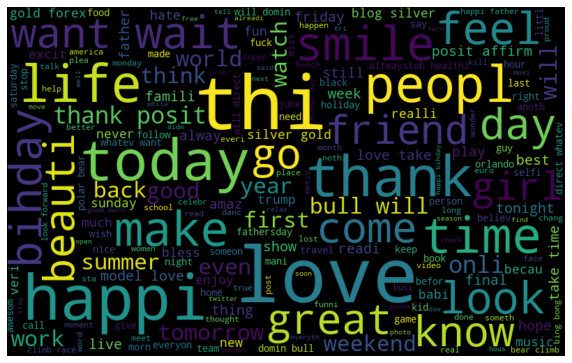

In [105]:
all_words=' '.join([test for test in combi['tidy_tweet']])
from wordcloud import WordCloud
wordcloud=WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
plt.show()

## 2. Words in non racist/sexist tweets

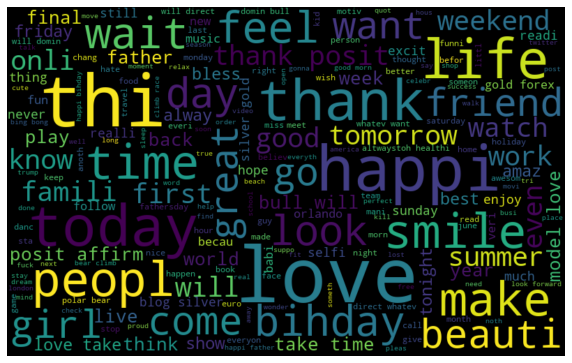

In [106]:
normal_words=' '.join([text for text in combi['tidy_tweet'][combi['label']==0]])
wordcloud=WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(normal_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
plt.show()

##  3. Words with Racist/Sexixt Tweets

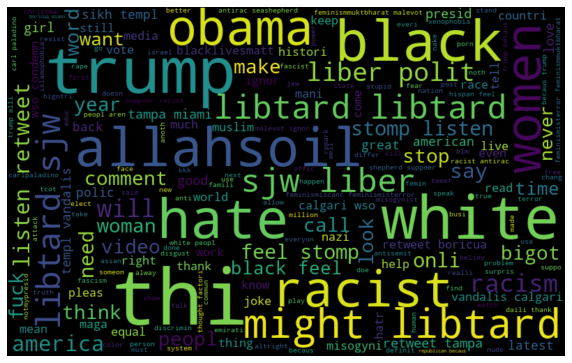

In [107]:
negative_words=' '.join([text for text in combi['tidy_tweet'][combi['label']==1]])
wordcloud=WordCloud(width=800,height=500,random_state=1,max_font_size=110).generate(negative_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
plt.show()

## 4. Understanding the impact of hashtags on tweets sentiment

In [108]:
#function to collect hashtags
def hashtag_extract(x):
    hashtags=[]
    for i in x:
        ht=re.findall(r"#(\w+)",i)
        hashtags.append(ht)
    return hashtags

In [109]:
#extracting hashtags from non racist tweets
# extracting hashtags from non racist/sexist tweets 
HT_regular = hashtag_extract(combi['tidy_tweet'][combi['label'] == 0]) 
# extracting hashtags from racist/sexist tweets 
HT_negative = hashtag_extract(combi['tidy_tweet'][combi['label'] == 1]) 
# unnesting list 
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

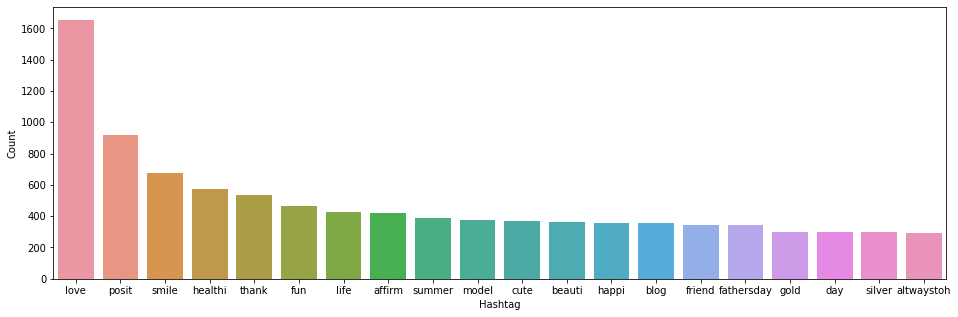

In [110]:
#Non-Racist/Sexist Tweets

a = nltk.FreqDist(HT_regular) 
d = pd.DataFrame({'Hashtag': list(a.keys()),'Count': list(a.values())}) 
# selecting top 20 most frequent hashtags  
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5)) 
ax = sns.barplot(data=d, x= "Hashtag", y = "Count") 
ax.set(ylabel = 'Count')
plt.show()

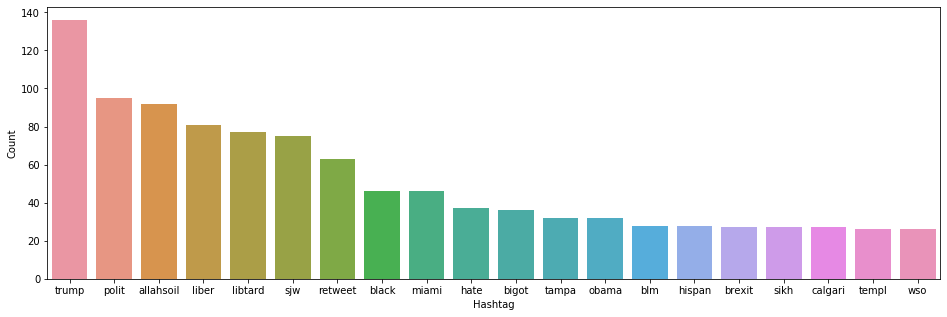

In [111]:
#Racist/Sexist Tweets

b = nltk.FreqDist(HT_negative) 
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())}) 
# selecting top 20 most frequent hashtags 
e = e.nlargest(columns="Count", n = 20)   
plt.figure(figsize=(16,5)) 
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")
#ax.set(ylabel = 'Count')
#plt.show()

# Extracting features from Cleaned Tweets
##  Depending upon the usage text features can be constructed using assorted techinque
### 1. Bags-of-Words
### 2.TF-IDF
### 3.Word Embeddings

In [112]:
#bags-of-words features
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer=CountVectorizer(max_df=0.90,min_df=2,max_features=1000,stop_words='english')
#bag-of-words feature matrix
bow=bow_vectorizer.fit_transform(combi['tidy_tweet'])

In [113]:
#TF-IDF features
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(max_df=0.90,min_df=2,max_features=1000,stop_words='english')
#Tf_idf feature matrix
tfidf=tfidf_vectorizer.fit_transform(combi['tidy_tweet'])

In [114]:
#model building using Bag-of_words features
from sklearn.model_selection import train_test_split
train_bow=bow[:31962,:]
test_bow=bow[31962:,:]
xtrain_bow,xvalid_bow,ytrain,yvalid=train_test_split(train_bow,train['label'],random_state=42,test_size=0.3)
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(xtrain_bow,ytrain)
prediction=logreg.predict_proba(xvalid_bow)# predicting on the validation set
prediction_int=prediction[:,1]>=0.3 # if prediction is greater than or equal to 0.3 than 1 else 0
prediction_int=prediction_int.astype(np.int)
from sklearn.metrics import f1_score
f1_score(yvalid,prediction_int)

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.5307820299500832

In [117]:
#building a model using TD-IDF
train_tfidf=tfidf[:31962,:]
test_tfidf=tfidf[31962:,:]
xtrain_tfidf=train_tfidf[ytrain.index]
xvalid_tfidf=train_tfidf[yvalid.index]
logreg.fit(xtrain_tfidf,ytrain)
prediction=logreg.predict_proba(xvalid_tfidf)
prediction_int=prediction[:,1]>=0.3
prediction_int=prediction_int.astype(np.int)
f1_score(yvalid,prediction_int)

0.5446507515473032

In [119]:
test_pred = logreg.predict_proba(test_tfidf) 
test_pred_int = test_pred[:,1] >= 0.3 
test_pred_int = test_pred_int.astype(np.int) 
test['label'] = test_pred_int 
submission = test[['id','label']] 
submission.to_csv('sub_lreg_tfidf.csv', index=False) # writing data to a CSV file